# Method 2

- In this method, we'll clean the texts using regular expression and use porter stemming to reduce the number of words.

## Importing modules and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
import nltk

In [2]:
raw_data = pd.read_csv('amazon_alexa.tsv', delimiter='\t', quoting=3)
raw_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
data = raw_data.copy()

## Exploring the dataset

In [4]:
data.shape

(3150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [8]:
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [9]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

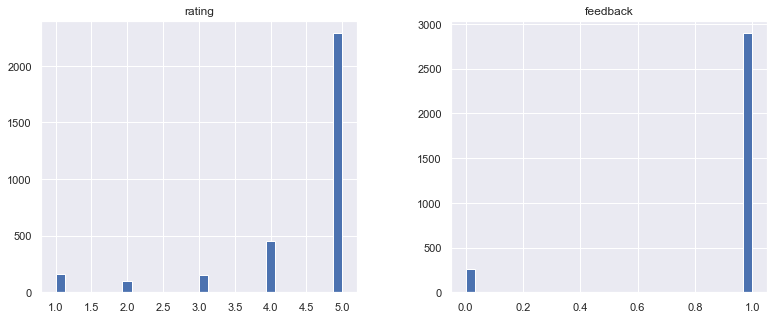

In [12]:
data.hist(bins = 30, figsize=(13,5), color = 'b')
plt.show()

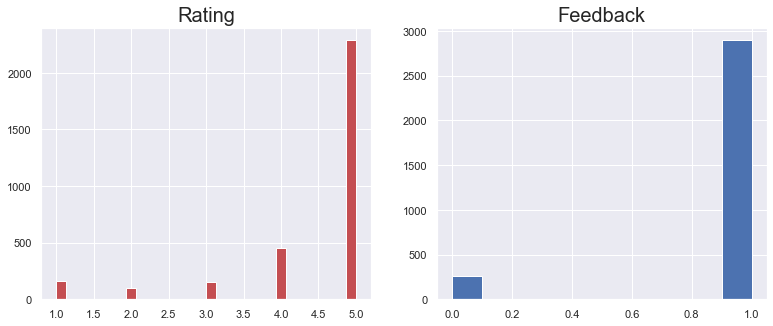

In [13]:
f, ax = plt.subplots(1,2,figsize = (13,5))
# plt.figure()

ax[0].hist(data['rating'], bins = 30, color = 'r')
ax[0].set_title('Rating', fontsize = 20)
ax[1].hist(data['feedback'], color = 'b')
ax[1].set_title('Feedback', fontsize = 20)
plt.show()

In [16]:
data['verified_reviews'].loc[(data['feedback'] == 0) & (data['rating'] == 1)]

141                                    Not much features.
162     "Stopped working after 2 weeks ,didn't follow ...
341                                Alexa hardly came on..
350     Item no longer works after just 5 months of us...
361     This thing barely works. You have to select 3r...
                              ...                        
3024    "I was really happy with my original echo so i...
3047    Echo Dot responds to us when we aren't even ta...
3048                NOT CONNECTED TO MY PHONE PLAYLIST :(
3091                                    I didn’t order it
3096    The product sounded the same as the emoji spea...
Name: verified_reviews, Length: 161, dtype: object

### Adding length column for exploration

In [7]:
data['length'] = data['verified_reviews'].apply(len)

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [20]:
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

In [23]:
data[data['length'] == 1].iloc[0]

rating                                 5
date                           30-Jul-18
variation           Heather Gray Fabric 
verified_reviews                       😍
feedback                               1
length                                 1
Name: 60, dtype: object

In [24]:
data[data['length'] == max(data['length'])].iloc[0]

rating                                                              5
date                                                        20-Jul-18
variation                                                 Black  Plus
verified_reviews    "Incredible piece of technology.I have this ri...
feedback                                                            1
length                                                           2853
Name: 2016, dtype: object

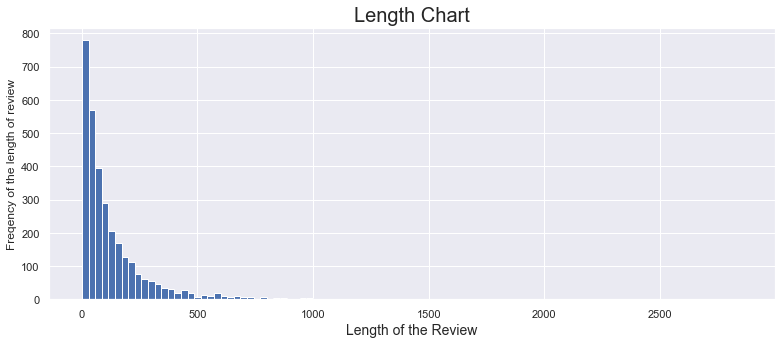

In [25]:
plt.figure(figsize= (13,5))
plt.hist(data['length'], bins = 100)
plt.title('Length Chart', fontsize = 20)
plt.xlabel('Length of the Review', fontsize = 14)
plt.ylabel('Freqency of the length of review', fontsize = 12)
plt.show()

### WordCloud for negative and positive reviews

In [4]:
negative_rev = data[data['feedback'] == 0]

positive_rev = data[data['feedback'] == 1]

In [27]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

## Data Cleaning

In [28]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback',
       'length'],
      dtype='object')

#### Setting a check-point for the data

In [9]:
data_cleaning = data.copy()

In [10]:
data_cleaning.drop(['rating', 'date', 'length'], axis = 1, inplace = True)

In [8]:
data_cleaning.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,Charcoal Fabric,Music,1


In [32]:
data_cleaning['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [36]:
data_cleaning[['variation', 'feedback']].loc[data_cleaning['feedback'] == 1].value_counts()

variation                     feedback
Black  Dot                    1           480
Charcoal Fabric               1           418
Configuration: Fire TV Stick  1           322
Black  Show                   1           247
Black  Plus                   1           242
Black                         1           226
Black  Spot                   1           209
White  Dot                    1           172
Heather Gray Fabric           1           155
White  Spot                   1            97
Sandstone Fabric              1            84
White                         1            74
White  Show                   1            74
White  Plus                   1            70
Oak Finish                    1            14
Walnut Finish                 1             9
dtype: int64

#### Converting the echo dot variations into columns

In [11]:
variation_dummies = pd.get_dummies(data_cleaning['variation'], drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
data_cleaning.drop(['variation'], axis = 1, inplace = True)

In [13]:
data_cleaning.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"""Sometimes while playing a game, you can answe...",1
3,"""I have had a lot of fun with this thing. My 4...",1
4,Music,1


### Cleaning reviews

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [19]:
# Creating a funtion to clean the message

def message_cleaning(message):
    msg = re.sub('[^a-zA-Z]', ' ', message)
    msg = msg.lower()
    msg = msg.split()
    
    ps = PorterStemmer()
    
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    
    msg = [ps.stem(word) for word in msg if word not in set(all_stopwords)]
    msg = ' '.join(msg)
    
    return msg

In [20]:
data_clean = data_cleaning['verified_reviews'].apply(message_cleaning)

In [21]:
data_clean

0                                               love echo
1                                                    love
2       sometim play game answer question correctli al...
3       lot fun thing yr old learn dinosaur control li...
4                                                   music
                              ...                        
3145                            perfect kid adult everyon
3146    listen music search locat check time look weat...
3147    love thing run entir home tv light thermostat ...
3148    complaint sound qualiti great mostli use comma...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [24]:
data_clean = data_clean.tolist()

In [25]:
type(data_clean)

list

In [26]:
data_clean

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad not see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons not seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come not get around fast like enjoy littl b

### Trying to transform cleaned data into vector form

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
review_clean = cv.fit_transform(data_clean).toarray()

In [29]:
print(review_clean)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
print(cv.get_feature_names())

['abay', 'abc', 'abd', 'abil', 'abl', 'abod', 'absolut', 'absolutli', 'ac', 'accent', 'accept', 'access', 'accessori', 'accesss', 'accid', 'accident', 'accompani', 'accomplish', 'accord', 'accordingli', 'account', 'accur', 'accuraci', 'accustom', 'acknowledg', 'acoust', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adapt', 'add', 'addict', 'addit', 'addon', 'address', 'adept', 'adequ', 'adjac', 'adjust', 'admit', 'adopt', 'ador', 'adult', 'advanc', 'advantag', 'advertis', 'advic', 'advis', 'aesthet', 'af', 'affirm', 'afford', 'afraid', 'afternoon', 'afterward', 'age', 'agent', 'ago', 'agre', 'agreement', 'ahead', 'ai', 'aid', 'aint', 'air', 'aka', 'al', 'alabama', 'alarm', 'albeit', 'alcohol', 'alert', 'alex', 'alexa', 'alexi', 'alexia', 'alexu', 'algo', 'aliv', 'allevi', 'allow', 'allrecip', 'almost', 'alon', 'along', 'alongsid', 'alot', 'aloud', 'alread', 'alreadi', 'alright', 'also', 'alter', 'altern', 'although', 'alway', 'amaonmaz', 'amax', 'amaz', 'amazin', 'amazingli', 'a

In [31]:
print(review_clean.shape)

(3150, 2766)


In [33]:
data_cleaning.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"""Sometimes while playing a game, you can answe...",1
3,"""I have had a lot of fun with this thing. My 4...",1
4,Music,1


In [34]:
variation_dummies.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [35]:
data_no_review = data_cleaning.drop(['verified_reviews'], axis = 1)
data_no_review.head()

,feedback
0,1
1,1
2,1
3,1
4,1


In [40]:
reviews = pd.DataFrame(review_clean)
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
new_data = pd.concat([data_no_review, variation_dummies, reviews], axis = 1)
new_data.head()

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
X = new_data.drop(['feedback'], axis = 1)
y = new_data['feedback']

In [43]:
X.head()

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,...,2756,2757,2758,2759,2760,2761,2762,2763,2764,2765
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: feedback, dtype: int64

In [45]:
print(X.shape, y.shape)

(3150, 2781) (3150,)


## Model Building

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

### Naive Bayes model

### Multinomial NB

In [47]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
y_pred_mnb = NB_classifier.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_pred_mnb)
print(cm)

[[ 17  31]
 [ 15 567]]


In [52]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.53      0.35      0.42        48
           1       0.95      0.97      0.96       582

    accuracy                           0.93       630
   macro avg       0.74      0.66      0.69       630
weighted avg       0.92      0.93      0.92       630



In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test, y_pred_mnb)

0.926984126984127

### Gaussian NB

In [55]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred_gnb = gnb_classifier.predict(X_test)

In [57]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print(cm_gnb)

[[ 27  21]
 [265 317]]


In [58]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.09      0.56      0.16        48
           1       0.94      0.54      0.69       582

    accuracy                           0.55       630
   macro avg       0.52      0.55      0.42       630
weighted avg       0.87      0.55      0.65       630



In [59]:
accuracy_score(y_test, y_pred_gnb)

0.546031746031746

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [61]:
y_pred_lr = log_reg.predict(X_test)

In [62]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[ 19  29]
 [  9 573]]


In [63]:
print(accuracy_score(y_test, y_pred_lr))

0.9396825396825397


In [64]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50        48
           1       0.95      0.98      0.97       582

    accuracy                           0.94       630
   macro avg       0.82      0.69      0.73       630
weighted avg       0.93      0.94      0.93       630



### RandomForest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state = 0)
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [67]:
y_pred_rfc = rfc_classifier.predict(X_test)

In [68]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)

[[ 15  33]
 [ 14 568]]


In [69]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.52      0.31      0.39        48
           1       0.95      0.98      0.96       582

    accuracy                           0.93       630
   macro avg       0.73      0.64      0.67       630
weighted avg       0.91      0.93      0.92       630



In [70]:
print(accuracy_score(y_test, y_pred_rfc))

0.9253968253968254
